### Principal Component Analysis, PCA

### Step by step Approach
PCA: http://sebastianraschka.com/Articles/2014_pca_step_by_step.html  
SVD: http://ccjou.wordpress.com/ (search SVD)

The main purposes of a principal component analysis are the analysis of data to identify **patterns** and finding patterns to **reduce the dimensions** of the dataset with **minimal loss** of information.

Here, our desired outcome of the principal component analysis is to project a feature space (our dataset consisting of n-dimensional samples) onto **a smaller subspace** that represents our data "well".

A possible application would be a pattern classification task, where we want to reduce the computational costs and the error of parameter estimation by reducing the number of dimensions of our feature space by extracting a subspace that describes our data "best".

PCA is an **unsupervised** algorithm.

### Step 1: data

In [1]:
import numpy as np

np.random.seed(2342347) # random seed for consistency 234234782384239784

# A reader pointed out that Python 2.7 would raise a
# "ValueError: object of too small depth for desired array".
# This can be avoided by choosing a smaller random seed, e.g. 1
# or by completely omitting this line, since I just used the random seed for
# consistency.

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class2_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

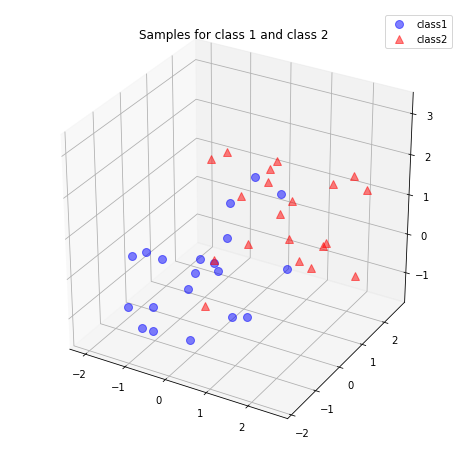

In [2]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

%matplotlib inline

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10
ax.plot(class1_sample[0,:], class1_sample[1,:],\
    class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:],\
    class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')
plt.draw()
plt.show()

In [3]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,40), "The matrix has not the dimensions 3x40"

print(all_samples.shape)
print(all_samples)

(3, 40)
[[-0.29249497  0.26420068 -0.90867382 -2.05888574  1.05285551  0.18091616
   0.82849393 -1.19309725  0.59451453  0.20395804 -0.25859823 -1.48157613
  -1.14009767 -1.17438419 -0.38137422 -0.7284438  -0.26889666 -1.95468842
  -0.40844531  1.77475839  2.22537096  0.7580175   0.71389757  0.33031036
   2.59567267  0.63324884  1.6400377   1.77997172 -0.43984061 -0.28215235
   0.90177533  0.28022956  0.51248383  0.82413868  1.58846484  0.83338641
  -0.31122015  2.23259972  1.80192987  1.76225185]
 [ 0.43157037 -1.39370766 -1.62563805 -0.22151187  1.04378043  0.02509786
   1.14162149 -1.68140798 -0.45645483 -1.52091286  0.86664594  0.05971542
  -0.85100658 -0.82444591  2.10271396  0.41136456  0.23481557  0.156723
  -0.57881306 -1.82669363  0.46945345  1.74006434  1.31414202  0.34409388
   1.66729865  0.12561935  1.04991722  1.41343149  0.12261497  0.25731125
   1.82207444  1.90681305  1.2026231  -1.01117726  2.0036274   0.57603176
   0.20471219  1.90676671 -0.18380043  2.61545698]
 [-0

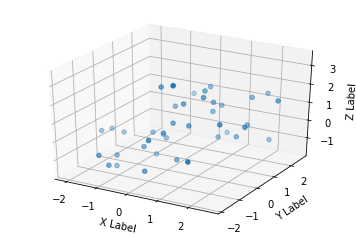

In [4]:
from mpl_toolkits.mplot3d import Axes3D

# this is the key command for interactive UI 
#%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(all_samples[0,:], all_samples[1,:], all_samples[2,:])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

### Step 2: move to [0,0,0]

In [5]:
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[ 0.32576538]
 [ 0.37601327]
 [ 0.33054809]]


### Step 3: Covariance Matrix
Scatter matrix is an estimation of Covariance matrix. You can use either of them to calculate eigen vlaue.

In [6]:
# scatter matrix is a statistic that is used to make estimates of the covariance matrix of the multivariate normal distribution

# Setp 3.A
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)

Scatter Matrix:
 [[ 53.3484232   23.19069091  21.46467362]
 [ 23.19069091  52.8014702   17.55487511]
 [ 21.46467362  17.55487511  51.1236242 ]]


In [7]:
# Step 3.B, Covariance Matrix
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 1.36790829  0.5946331   0.55037625]
 [ 0.5946331   1.35388385  0.450125  ]
 [ 0.55037625  0.450125    1.31086216]]


### Step 4: eigenvlaues and eigenvectors

In [8]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')

Eigenvector 1: 
[[ 0.6131328 ]
 [ 0.57507225]
 [ 0.54162726]]
Eigenvalue 1 from scatter matrix: 94.06093307102839
Eigenvalue 1 from covariance matrix: 2.4118187966930345
Scaling factor:  39.0
----------------------------------------
Eigenvector 2: 
[[ 0.78845466]
 [-0.48805716]
 [-0.37435206]]
Eigenvalue 2 from scatter matrix: 28.802017875300233
Eigenvalue 2 from covariance matrix: 0.7385132788538521
Scaling factor:  39.0
----------------------------------------
Eigenvector 3: 
[[-0.04906558]
 [-0.65657606]
 [ 0.75266224]]
Eigenvalue 3 from scatter matrix: 34.41056665405265
Eigenvalue 3 from covariance matrix: 0.8823222218987855
Scaling factor:  39.0
----------------------------------------


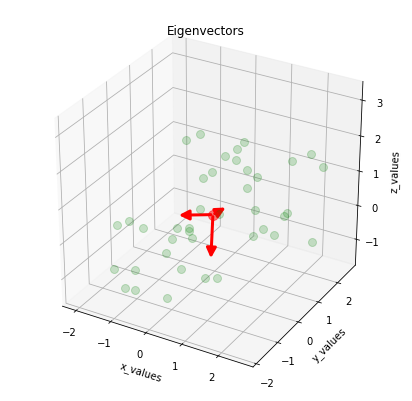

In [9]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

%matplotlib inline

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:],
        'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o',
        markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]],
                mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

### Step 5,6: transformed data

In [10]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

94.060933071
34.4105666541
28.8020178753


In [11]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.6131328  -0.04906558]
 [ 0.57507225 -0.65657606]
 [ 0.54162726  0.75266224]]


(3, 2)
(2, 3)
(3, 40)


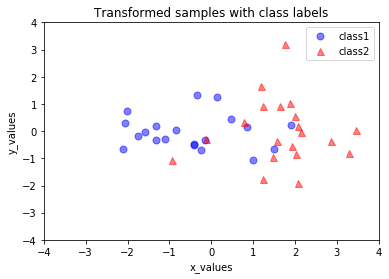

In [12]:
print(matrix_w.shape)
print(matrix_w.T.shape)
print(all_samples.shape)

transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,40), "The matrix is not 2x40 dimensional."


plt.plot(transformed[0,0:20], transformed[1,0:20],
     'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40],
     '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.draw()
plt.show()

### matplotlib.mlab Approach
https://matplotlib.org/api/mlab_api.html

PC axes in terms of the measurement axes scaled by the standard deviations:
 [[ 0.60371923  0.57059045  0.5567312 ]
 [-0.09229957 -0.6436346   0.75974686]
 [-0.79183577  0.51005984  0.33590933]]


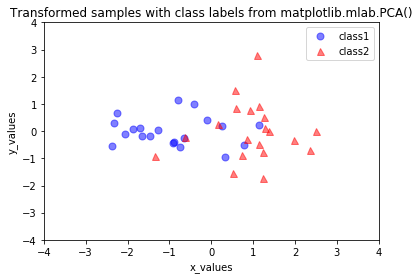

In [13]:
from matplotlib.mlab import PCA as mlabPCA

mlab_pca = mlabPCA(all_samples.T, standardize=True)

print('PC axes in terms of the measurement axes'\
        ' scaled by the standard deviations:\n',\
          mlab_pca.Wt)

plt.plot(mlab_pca.Y[0:20,0],mlab_pca.Y[0:20,1], 'o', markersize=7,\
        color='blue', alpha=0.5, label='class1')
plt.plot(mlab_pca.Y[20:40,0], mlab_pca.Y[20:40,1], '^', markersize=7,\
        color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.draw()
plt.show()

### sklearnPCA Approach
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [14]:
from sklearn.decomposition import PCA as sklearnPCA

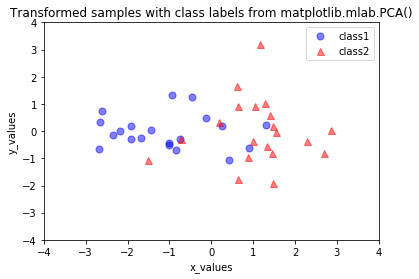

In [15]:
sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(all_samples.T)

plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7,
         color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], '^', markersize=7,
         color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

In [16]:
print(sklearn_pca)

print(sklearn_pca.components_)
print(sklearn_pca.explained_variance_ratio_) # This is very important!

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
[[ 0.6131328   0.57507225  0.54162726]
 [-0.04906558 -0.65657606  0.75266224]]
[ 0.59807229  0.21879441]


### Another Approach

(1000, 2)
[[-0.31597151 -0.94876868]
 [-0.94876868  0.31597151]]


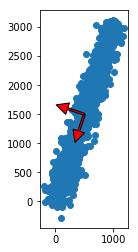

In [17]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000
xTrue = np.linspace(0, 1000, N)
yTrue = 3 * xTrue
xData = xTrue + np.random.normal(0, 100, N)
yData = yTrue + np.random.normal(0, 100, N)
xData = np.reshape(xData, (N, 1))
yData = np.reshape(yData, (N, 1))
data = np.hstack((xData, yData))

print(data.shape)

mu = data.mean(axis=0)
data = data - mu
# data = (data - mu)/data.std(axis=0)  # Uncomment this reproduces mlab.PCA results
eigenvectors, eigenvalues, V = np.linalg.svd(data.T, full_matrices=False)
projected_data = np.dot(data, eigenvectors)
sigma = projected_data.std(axis=0).mean()
print(eigenvectors)

def annotate(ax, name, start, end):
    arrow = ax.annotate(name,
                        xy=end, xycoords='data',
                        xytext=start, textcoords='data',
                        arrowprops=dict(facecolor='red', width=2.0))
    return arrow

fig, ax = plt.subplots()
ax.scatter(xData, yData)
ax.set_aspect('equal')
for axis in eigenvectors:
    annotate(ax, '', mu, mu + sigma * axis)
plt.show()